In [1]:
import utils
import pandas as pd
from datetime import datetime

c:\Users\agand\OneDrive\Escritorio\lakes\lake-algae-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import importlib
import utils

importlib.reload(utils)

<module 'utils' from 'c:\\Users\\agand\\OneDrive\\Escritorio\\lakes\\lake-algae-analysis\\notebooks\\utils.py'>

In [3]:
all_saved_logs = pd.read_csv(r"../data/all_saved_logs.csv")
all_lakes = pd.read_csv(f"{utils.get_data_directory()}/all_lakes.csv")
all_saved_logs = all_saved_logs.drop(["total_pixel_area"], axis = 1)
df = pd.merge(all_saved_logs,all_lakes, on='osmid', how='inner')
df["day"] = pd.to_datetime(df["day"], format='%Y-%m-%d')
df_2024 = df[(df["day"] > datetime(2024, 1, 1)) & (df["exists_true_image"] == True)]

In [4]:
df_grouped = df_2024.groupby('osmid').agg(
    max_water_area=('water_area', 'max'),
    min_cloud_area=('cloud_area', 'min'),
    total_area = ("total_pixel_area", "max"),
    max_water_with_no_clouds_area=('water_with_no_clouds_area', 'max'),
    count_records=('osmid', 'size')  # Conteo de registros por cada osmid
).reset_index()


In [5]:
df_grouped

,osmid,max_water_area,min_cloud_area,total_area,max_water_with_no_clouds_area,count_records
0,1000877890,275950.0,0.0,1244750,173500.0,24
1,1000877892,865625.0,0.0,2499700,405575.0,23
2,1001772927,756400.0,0.0,985450,659725.0,7
3,1002016842,132400.0,0.0,969300,15925.0,24
4,1016927646,345600.0,0.0,908550,137275.0,25
...,...,...,...,...,...,...
355,97868797,2886125.0,0.0,3437475,2886125.0,7
356,989004111,322625.0,0.0,1249800,291975.0,12
357,995251562,902950.0,0.0,890700,91325.0,22
358,9961445,4468650.0,0.0,4437750,4318600.0,25


In [6]:
df_grouped = df_grouped[["osmid", "max_water_area", "max_water_with_no_clouds_area", "count_records"]]

In [7]:
df_grouped

,osmid,max_water_area,max_water_with_no_clouds_area,count_records
0,1000877890,275950.0,173500.0,24
1,1000877892,865625.0,405575.0,23
2,1001772927,756400.0,659725.0,7
3,1002016842,132400.0,15925.0,24
4,1016927646,345600.0,137275.0,25
...,...,...,...,...
355,97868797,2886125.0,2886125.0,7
356,989004111,322625.0,291975.0,12
357,995251562,902950.0,91325.0,22
358,9961445,4468650.0,4318600.0,25


In [8]:
df_post_grouped =  pd.merge(df_2024,df_grouped, on='osmid', how='inner')

In [9]:
df_post_grouped.loc[:,"cloud_ratio"] = df_post_grouped["cloud_area"]/df_post_grouped["max_water_area"]
df_post_grouped.loc[:, "water_ratio"] = df_post_grouped["max_water_area"] / df_post_grouped["total_pixel_area"]


cluster_df = df_post_grouped[(df_post_grouped["cloud_ratio"]<0.10) & (df_post_grouped["water_with_no_clouds_area"]>500000)].copy()

In [15]:
df_post_grouped

,osmid,day,exists_true_image,water_area,cloud_area,water_with_no_clouds_area,no_chl_area,chl_very_low_area,chl_low_area,chl_moderate_area,...,centroid_long,centroid_lat,pixel_count,total_pixel_area,resolution,max_water_area,max_water_with_no_clouds_area,count_records,cloud_ratio,water_ratio
0,1624070,2024-01-25,True,443616875.0,199115000.0,342863125.0,144963125.0,45625.0,39214375.0,88605625.0,...,80.160980,13.630831,1053149,658218125,25,491740000.0,398895625.0,18,0.404919,0.747078
1,1624070,2024-03-05,True,331030625.0,88051250.0,305414375.0,65399375.0,222500.0,93954375.0,126409375.0,...,80.160980,13.630831,1053149,658218125,25,491740000.0,398895625.0,18,0.179061,0.747078
2,1624070,2024-04-14,True,382576250.0,27640000.0,362883750.0,104605000.0,428750.0,144733125.0,84498750.0,...,80.160980,13.630831,1053149,658218125,25,491740000.0,398895625.0,18,0.056209,0.747078
3,1624070,2024-05-24,True,390539375.0,11503750.0,382618750.0,150752500.0,362500.0,159971875.0,47721250.0,...,80.160980,13.630831,1053149,658218125,25,491740000.0,398895625.0,18,0.023394,0.747078
4,1624070,2024-07-03,True,462668750.0,454092500.0,192956250.0,192954375.0,0.0,1875.0,0.0,...,80.160980,13.630831,1053149,658218125,25,491740000.0,398895625.0,18,0.923440,0.747078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4169,999679411,2024-07-01,True,0.0,982400.0,0.0,0.0,0.0,0.0,0.0,...,78.584431,9.520923,38683,967075,5,982400.0,240600.0,26,1.000000,1.015847
4170,999679411,2024-05-22,True,0.0,982400.0,0.0,0.0,0.0,0.0,0.0,...,78.584431,9.520923,38683,967075,5,982400.0,240600.0,26,1.000000,1.015847
4171,999679411,2024-04-12,True,85425.0,982400.0,0.0,0.0,0.0,0.0,0.0,...,78.584431,9.520923,38683,967075,5,982400.0,240600.0,26,1.000000,1.015847
4172,999679411,2024-03-03,True,525400.0,838875.0,139850.0,139850.0,0.0,0.0,0.0,...,78.584431,9.520923,38683,967075,5,982400.0,240600.0,26,0.853904,1.015847


In [10]:
# cluster_df.loc[:,"no_chl_ratio"] = cluster_df["no_chl_area"] / cluster_df["water_with_no_clouds_area"]
# cluster_df.loc[:,"low_chl_ratio"] = (cluster_df["chl_very_low_area"] + cluster_df["chl_low_area"]) / cluster_df["water_with_no_clouds_area"]
# cluster_df.loc[:,"moderate_chl_ratio"] = cluster_df["chl_moderate_area"] / cluster_df["water_with_no_clouds_area"]
# cluster_df.loc[:,"high_chl_ratio"] = (cluster_df["chl_very_high_area"] + cluster_df["chl_high_area"]) / cluster_df["water_with_no_clouds_area"]

In [11]:
cluster_df.osmid.nunique()

265

In [90]:
# cluster_df = cluster_df[["osmid", "day"]].reset_index()
# cluster_df.loc[:, "no_chl_ratio"] = df_post_grouped["no_chl_area"]/df_post_grouped["max_water_area"]
# cluster_df.loc[:, "very_low_chl_ratio"] = df_post_grouped["chl_very_low_area"]/df_post_grouped["max_water_area"]
# cluster_df.loc[:, "low_chl_ratio"] = df_post_grouped["chl_low_area"]/df_post_grouped["max_water_area"]
# cluster_df.loc[:, "moderate_chl_ratio"] = df_post_grouped["chl_moderate_area"]/df_post_grouped["max_water_area"]
# cluster_df.loc[:, "high_chl_ratio"] = df_post_grouped["chl_high_area"]/df_post_grouped["max_water_area"]
# cluster_df.loc[:, "very_high_chl_ratio"] = df_post_grouped["chl_very_high_area"]/df_post_grouped["max_water_area"]


In [16]:
cluster_df.loc[:, "no_chl_ratio"] = df_post_grouped["no_chl_area"]/df_post_grouped["water_with_no_clouds_area"]
cluster_df.loc[:, "very_low_chl_ratio"] = df_post_grouped["chl_very_low_area"]/df_post_grouped["water_with_no_clouds_area"]
cluster_df.loc[:, "low_chl_ratio"] = df_post_grouped["chl_low_area"]/df_post_grouped["water_with_no_clouds_area"]
cluster_df.loc[:, "moderate_chl_ratio"] = df_post_grouped["chl_moderate_area"]/df_post_grouped["water_with_no_clouds_area"]
cluster_df.loc[:, "high_chl_ratio"] = df_post_grouped["chl_high_area"]/df_post_grouped["water_with_no_clouds_area"]
cluster_df.loc[:, "very_high_chl_ratio"] = df_post_grouped["chl_very_high_area"]/df_post_grouped["water_with_no_clouds_area"]
cluster_df = cluster_df.dropna()
cluster_df = cluster_df[["osmid", "day", "very_low_chl_ratio","low_chl_ratio", "moderate_chl_ratio", "high_chl_ratio", "very_high_chl_ratio"]]

In [22]:
cluster_df

,osmid,day,very_low_chl_ratio,low_chl_ratio,moderate_chl_ratio,high_chl_ratio,very_high_chl_ratio,cluster
2,1624070,2024-04-14,0.001182,0.398842,0.232853,0.076359,0.002504,3
3,1624070,2024-05-24,0.000947,0.418097,0.124723,0.057663,0.004567,1
13,25394157,2024-03-05,0.000064,0.363009,0.300028,0.000355,0.000006,3
15,25394157,2024-05-24,0.000027,0.013394,0.055311,0.000066,0.000000,1
23,82611270,2024-08-12,0.009610,0.568773,0.239969,0.025850,0.021176,3
...,...,...,...,...,...,...,...,...
4016,9319304,2024-05-02,0.000000,0.000000,0.000000,0.000000,0.000000,1
4020,9319304,2024-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,1
4084,97868797,2024-02-12,0.065399,0.196682,0.000000,0.000000,0.000000,1
4085,97868797,2024-03-23,0.020120,0.098708,0.000000,0.000000,0.000000,1


Centroides de los clusters:
   very_low_chl_ratio  low_chl_ratio  moderate_chl_ratio  high_chl_ratio  \
0            0.519127       0.176948            0.005520        0.001903   
1            0.024706       0.160739            0.013579        0.007177   
2            0.000045       0.005689            0.017539        0.272511   
3            0.001600       0.199605            0.363657        0.110848   

   very_high_chl_ratio  
0             0.000115  
1             0.003394  
2             0.397640  
3             0.005992  


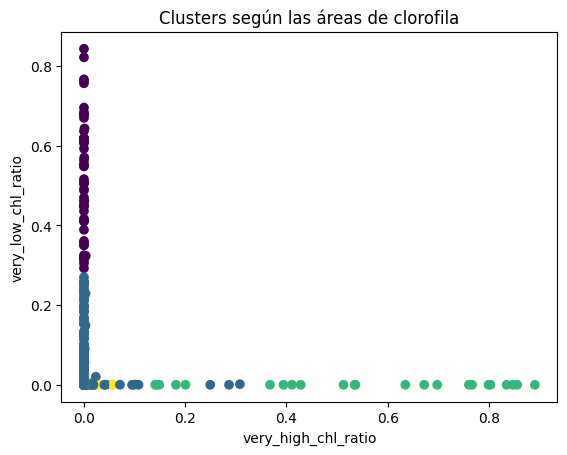

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supongo que cluster_df ya contiene las columnas de concentraciones de clorofila
# Normalizar los datos (excluyendo la columna 'cluster', si ya la tienes)
scaler = StandardScaler()
chl_scaled = scaler.fit_transform(cluster_df.drop(columns=['cluster', 'osmid', 'day'], errors='ignore'))

# Aplicar KMeans con 3 clusters (altas, medias, bajas concentraciones)
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_df.loc[:,'cluster'] = kmeans.fit_predict(chl_scaled)

# Analizar los centroides de los clusters (excluyendo la columna 'cluster')
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=cluster_df.columns[2:-1])
print("Centroides de los clusters:")
print(centroids)

# Graficar los clusters (opcional) usando dos variables relevantes
plt.scatter(cluster_df['very_high_chl_ratio'], cluster_df['very_low_chl_ratio'], c=cluster_df['cluster'], cmap='viridis')
plt.xlabel('very_high_chl_ratio')
plt.ylabel('very_low_chl_ratio')
plt.title('Clusters según las áreas de clorofila')
plt.show()



In [27]:
top_cluster_df = cluster_df[cluster_df["cluster"]==2]

In [28]:
top_cluster_df

,osmid,day,very_low_chl_ratio,low_chl_ratio,moderate_chl_ratio,high_chl_ratio,very_high_chl_ratio,cluster
38,25474612,2024-04-19,0.000000,0.000070,0.061404,0.438561,0.000000,2
73,34108030,2024-03-05,0.000871,0.114615,0.102603,0.381465,0.003674,2
112,117699391,2024-08-10,0.000109,0.000705,0.004554,0.696013,0.140790,2
557,115769453,2024-03-30,0.000000,0.000000,0.001653,0.516037,0.041163,2
563,115769453,2024-01-05,0.000000,0.002984,0.040896,0.320460,0.428172,2
577,115769453,2024-01-10,0.000000,0.019093,0.062845,0.602269,0.148826,2
1130,137356318,2024-01-04,0.000000,0.000709,0.002276,0.519870,0.181723,2
1308,1606905,2024-01-03,0.000000,0.000000,0.000000,0.363687,0.200577,2
1309,1606905,2024-02-12,0.000000,0.000000,0.000000,0.234915,0.634853,2
1310,1606905,2024-01-28,0.000000,0.000000,0.000000,0.001286,0.890801,2


In [29]:
top_cluster_df.osmid.unique()

array(['25474612', '34108030', '117699391', '115769453', '137356318',
       '1606905', '16288976', '171201578', '24711461', '25394523',
       '29894997', '41667728', '6743775', '8421510', '92001285'],
      dtype=object)

In [28]:
top_cluster_df.osmid.value_counts()

osmid
8421510       8
1606905       5
542065368     5
1623305       5
1273092884    4
25394523      3
6743775       3
115769453     3
376637622     2
92001285      2
137356318     1
538380755     1
102302994     1
8415450       1
7903593       1
758417504     1
117699391     1
563802369     1
1001772927    1
1288299018    1
16288976      1
357472        1
34107825      1
29894997      1
272761821     1
34108030      1
24711461      1
171201578     1
25474612      1
Name: count, dtype: int64

In [81]:
import pandas as pd

# Diccionario para mapear los valores numéricos actuales a las categorías descriptivas
map_to_categories = {0: "bueno", 1: "malo", 2: "excelente", 3: "medio"}

# Aplicar el mapeo en la columna 'cluster' para transformarlo en categorías
cluster_df['cluster_category'] = cluster_df['cluster'].map(map_to_categories)

# Definir el nuevo orden de las categorías: malo, medio, bueno, excelente
category_order = pd.CategoricalDtype(categories=["malo", "medio", "bueno", "excelente"], ordered=True)

# Convertir la columna 'cluster_category' en un tipo categórico con el nuevo orden
cluster_df['cluster_category'] = cluster_df['cluster_category'].astype(category_order)

# Convertir las categorías ordenadas de nuevo a números (0, 1, 2, 3) respetando el nuevo orden
cluster_df['cluster'] = cluster_df['cluster_category'].cat.codes

C:\Users\agand\AppData\Local\Temp\ipykernel_3428\3542164821.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['cluster_category'] = cluster_df['cluster'].map(map_to_categories)
C:\Users\agand\AppData\Local\Temp\ipykernel_3428\3542164821.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['cluster_category'] = cluster_df['cluster_category'].astype(category_order)
C:\Users\agand\AppData\Local\Temp\ipykernel_3428\3542164821.py:16: SettingWithCopyWarning: 
A value is trying to be set on

In [108]:
cluster_df[cluster_df["high_chl_ratio"]>0.05].cluster.value_counts()

cluster
2    59
0    26
1    26
3    18
Name: count, dtype: int64

In [76]:
all_saved_logs[all_saved_logs["osmid"]=='9961445']

,osmid,day,exists_true_image,water_area,cloud_area,water_with_no_clouds_area,no_chl_area,chl_very_low_area,chl_low_area,chl_moderate_area,chl_high_area,chl_very_high_area
8220,9961445,2024-04-01,True,9150.0,0.0,9150.0,9150.0,0.0,0.0,0.0,0.0,0.0
8221,9961445,2024-02-21,True,807075.0,3096800.0,149450.0,149450.0,0.0,0.0,0.0,0.0,0.0
8222,9961445,2024-08-09,True,408750.0,4468650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8223,9961445,2024-06-30,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8224,9961445,2024-05-21,True,32625.0,1518700.0,1975.0,1975.0,0.0,0.0,0.0,0.0,0.0
8225,9961445,2024-04-11,True,60825.0,0.0,60825.0,60825.0,0.0,0.0,0.0,0.0,0.0
8226,9961445,2024-01-01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8227,9961445,2024-01-02,True,224475.0,4042375.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8228,9961445,2024-02-11,True,209175.0,0.0,209175.0,159700.0,0.0,125.0,700.0,42400.0,6250.0
8229,9961445,2024-03-22,True,109050.0,0.0,109050.0,109050.0,0.0,0.0,0.0,0.0,0.0


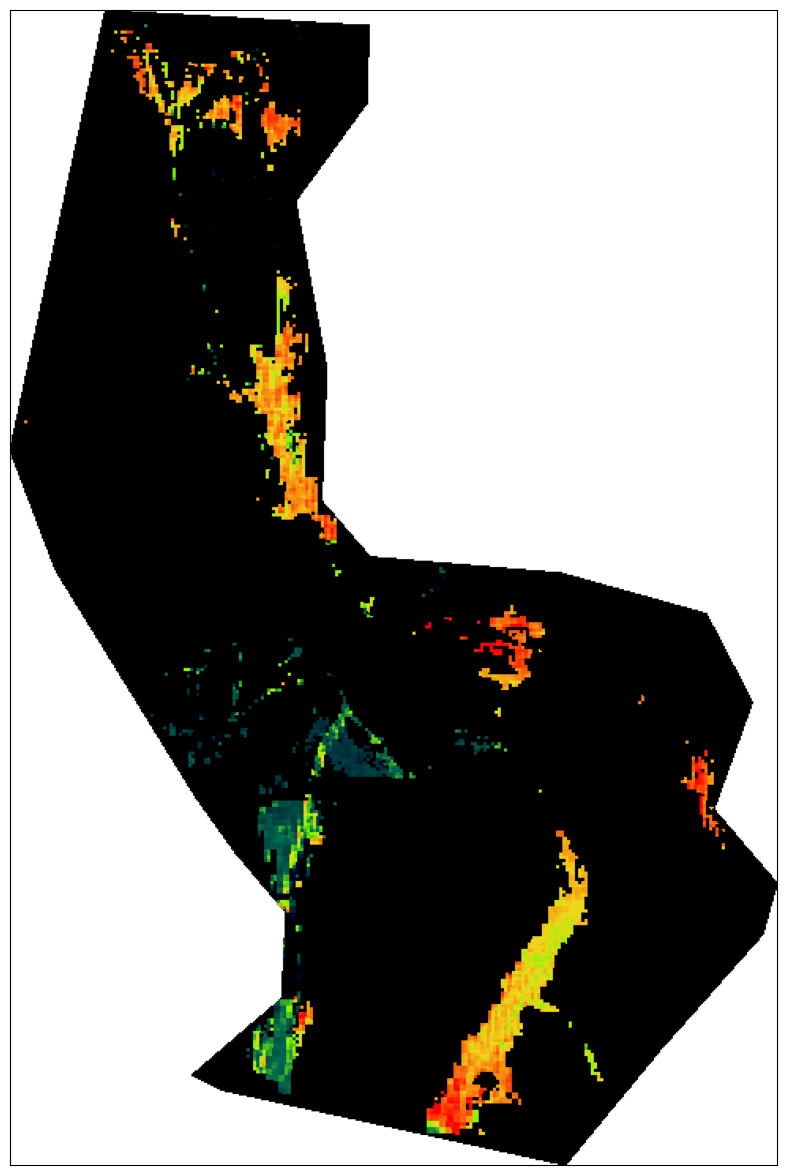

In [75]:
chl_image = utils.get_image_from_lake('9961445', 'chl', datetime(2024, 8, 19))
utils.plot_image(chl_image)

In [66]:
filtered_lakes = pd.read_csv(f"{utils.get_data_directory()}/filtered_lakes.csv")

In [68]:
top_cluster_df.loc[:,'osmid'] = top_cluster_df['osmid'].astype(str)
filtered_lakes.loc[:,'osmid'] = filtered_lakes['osmid'].astype(str)

# Filtrar los valores de 'osmid' que están en 'filtered_lakes'
result = top_cluster_df[top_cluster_df['osmid'].isin(filtered_lakes['osmid'])].osmid.unique()

# Mostrar los valores coincidentes
print(result)

['115769453' '1273092884' '1606905' '1623305' '16288976' '25394523'
 '357472' '376637622' '542065368' '7903593' '8421510' '92001285']


,osmid,day,no_chl_ratio,low_chl_ratio,moderate_chl_ratio,high_chl_ratio,cluster
38,25474612,2024-04-19,0.499965,0.000070,0.061404,0.438561,2
73,34108030,2024-03-05,0.396772,0.115486,0.102603,0.385139,2
99,102302994,2024-05-24,0.445020,0.000000,0.000000,0.554980,2
112,117699391,2024-08-10,0.157828,0.000814,0.004554,0.836803,2
193,1001772927,2024-05-04,0.614359,0.000179,0.016998,0.368463,2
557,115769453,2024-03-30,0.441148,0.000000,0.001653,0.557200,2
563,115769453,2024-01-05,0.207487,0.002984,0.040896,0.748632,2
577,115769453,2024-01-10,0.166967,0.019093,0.062845,0.751095,2
1006,1273092884,2024-02-29,0.314253,0.000000,0.000192,0.685556,2
1007,1273092884,2024-02-19,0.325899,0.000000,0.000000,0.674101,2
